In [ ]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 822.5 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=f092d2d7aa9455fca4f5035936a87d0f22c89f2650c41d39c2bbd551c89ce4cd
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import missingno as msno
import keras
import pandas_ta as ta

In [ ]:
sp500_df=pd.read_csv('/content/Sp500_weekly.csv', sep=',', header=0)
sp500_df['Date'] = pd.to_datetime(sp500_df.Date)

In [ ]:
#fillna sp500
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Low'] = 4109.86
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'High'] = 4212.91
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Close'] = 4191.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-14'), 'Open'] = 4126.65

sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Low'] =4103.98
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'High'] = 4212.87
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Close'] = 4205.45
sp500_df.loc[sp500_df['Date']==pd.to_datetime('2023-05-21'), 'Open'] = 4190.78

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#scaler
scaler = StandardScaler()
scaler2 = MinMaxScaler()

#standardization of the prices
sp500_df[['Close', 'Open', 'Low', 'High']] = scaler.fit_transform(sp500_df[['Close', 'Open', 'Low', 'High']])
sp500_df.loc[sp500_df['Volume']>0, ['Volume']] = scaler2.fit_transform(sp500_df.loc[sp500_df['Volume']>0, ['Volume']])

In [ ]:
#hurst coefficient of the time series
def hurst(ts):

    n = len(ts)
    max_window = int(n / 2)
    window_sizes = range(10, max_window)
    R_S = np.zeros(len(window_sizes))

    for i, window_size in enumerate(window_sizes):
        window_ranges = np.arange(0, n, window_size)
        R, S = 0, 0
        for j in window_ranges:
            if j + window_size < n:
                # Calculate the range and standard deviation
                window = ts[j:j+window_size]
                R += np.max(window) - np.min(window)
                S += np.std(window)

        # Calculate the rescaled range
        R_S[i] = R / S

    # Fit a linear line to log-log plot
    fit = np.polyfit(np.log(window_sizes), np.log(R_S), 1)

    # Hurst exponent is the slope of the line
    hurst_exponent = fit[0]

    return hurst_exponent


ts = sp500_df['Close']
print("Hurst Exponent for Close:", hurst(ts))

sp500_df['log return'] = np.log(sp500_df['Close'].shift(-1)/sp500_df['Close'])
ts1 = sp500_df['log return']
print("Hurst Exponent for Log return:", hurst(ts1))

sp500_df['return'] = sp500_df['Close'].shift(-1)/sp500_df['Close']
ts2 = sp500_df['return']
print("Hurst Exponent for return:", hurst(ts2))

Hurst Exponent for Close: 0.01582081381133979


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Hurst Exponent for Log return: 0.5020095357639881
Hurst Exponent for return: 0.508769976739868


In [ ]:
pip install hurst

In [ ]:
sp500_df['return'] = sp500_df['Close'].shift(-1)/sp500_df['Close']
sp500_df

,Date,Open,High,Low,Close,Volume,return
0,1994-03-06,-1.200105,-1.204551,-1.198841,-1.200693,0.013344,0.998697
1,1994-03-13,-1.201332,-1.205542,-1.194193,-1.199129,0.013976,0.996456
2,1994-03-20,-1.199763,-1.202795,-1.191368,-1.194878,0.015527,1.008069
3,1994-03-27,-1.195501,-1.202822,-1.195951,-1.204520,0.009551,1.011311
4,1994-04-03,-1.205170,-1.211864,-1.218793,-1.218144,0.010039,0.998996
...,...,...,...,...,...,...,...
1561,2024-02-04,2.884182,2.894265,2.905184,2.933524,0.281337,1.021325
1562,2024-02-11,2.943450,2.944084,2.973409,2.996082,0.250867,0.993539
1563,2024-02-18,3.007701,2.960757,2.975485,2.976726,0.310273,1.025723
1564,2024-02-25,2.973094,3.017762,2.999515,3.053295,0.287846,0.994194


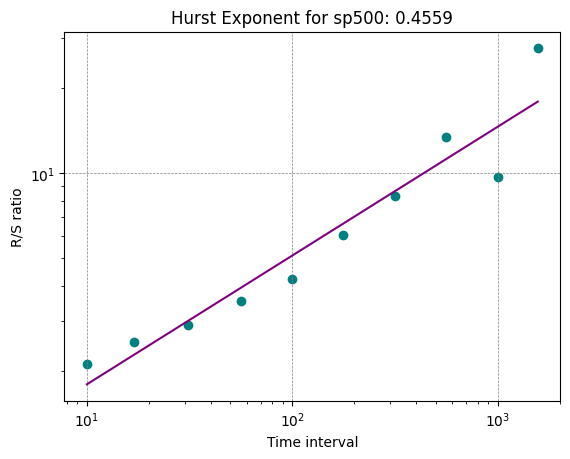

H=0.4559, c=0.6266


In [ ]:
from hurst import compute_Hc, random_walk

# Generate a random time series (e.g., a random walk)

# Compute the Hurst coefficient
H, c, data = compute_Hc(sp500_df.dropna()['return'])

# Plot the Hurst coefficient
plt.style.use('default')
plt.plot(data[0], c * data[0]**H, color="#800080")
plt.scatter(data[0], data[1], color="#008080")
plt.xscale("log")
plt.yscale("log")
plt.ylabel("R/S ratio")
plt.xlabel("Time interval")
plt.grid(True, linestyle='--', linewidth=0.5, color='gray')
plt.title("Hurst Exponent for sp500: {:.4f}".format(H))
plt.gca().set_facecolor('none')
plt.savefig('hurst sp500.png', transparent=True)
plt.grid(True)
plt.show()
print("H={:.4f}, c={:.4f}".format(H,c))

##PRIMA ARCHITETTURA

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense

def LSTM_model(X_train, p_dropout=0.2):
  model =Sequential()
  model.add(
      LSTM(units=50,
           return_sequences=True,
           input_shape =(X_train.shape[1],1))
  )
  model.add(Dropout(p_dropout))
  model.add(LSTM(units=50,
           return_sequences=True))
  model.add(Dropout(p_dropout))

  model.add(Dense(units=1))
  return model

In [ ]:
splitlimit = int(len(sp500_df) * 0.8)
sp500_df_train_set = sp500_df.loc[:splitlimit,:]
sp500_df_test_set = sp500_df.loc[splitlimit:,:]

X_train=[]
y_train =[]
df_days=sp500_df_train_set.shape[0]

for x in range(5, df_days): #prendo intanto una finestra di 5 settimane
  X_train.append(sp500_df.loc[x-5:x-1,'Close'])
  y_train.append(sp500_df.loc[x,'Close'])

X_train,y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))


X_test=[]
y_test =[]

for x in range(df_days, sp500_df.shape[0]): #prendo intanto una finestra di 5 settimane
  X_test.append(sp500_df.loc[x-5:x-1,'Close'])
  y_test.append(sp500_df.loc[x,'Close'])

X_test,y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [ ]:
#definition
model=LSTM_model(X_train)
model.build()
display(model.summary())
model.compile(optimizer='adam',
              loss='mean_squared_error')

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 5, 50)             10400     
                                                                 
 dropout (Dropout)           (None, 5, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 5, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 5, 50)             0         
                                                                 
 dense (Dense)               (None, 5, 1)              51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None

Epoch 1/10
42/42 [==============================] - 11s 80ms/step - loss: 0.2824 - val_loss: 3.3374
Epoch 2/10
42/42 [==============================] - 1s 19ms/step - loss: 0.2278 - val_loss: 4.5439
Epoch 3/10
42/42 [==============================] - 1s 22ms/step - loss: 0.2149 - val_loss: 4.7631
Epoch 4/10
42/42 [==============================] - 1s 26ms/step - loss: 0.2101 - val_loss: 4.6465
Epoch 5/10
42/42 [==============================] - 1s 32ms/step - loss: 0.2075 - val_loss: 4.6602
Epoch 6/10
42/42 [==============================] - 1s 27ms/step - loss: 0.2069 - val_loss: 4.6648
Epoch 7/10
42/42 [==============================] - 1s 17ms/step - loss: 0.2060 - val_loss: 4.7279
Epoch 8/10
42/42 [==============================] - 1s 17ms/step - loss: 0.2068 - val_loss: 4.6584
Epoch 9/10
42/42 [==============================] - 1s 18ms/step - loss: 0.2051 - val_loss: 4.6164
Epoch 10/10
10/10 [==============================] - 2s 8ms/step


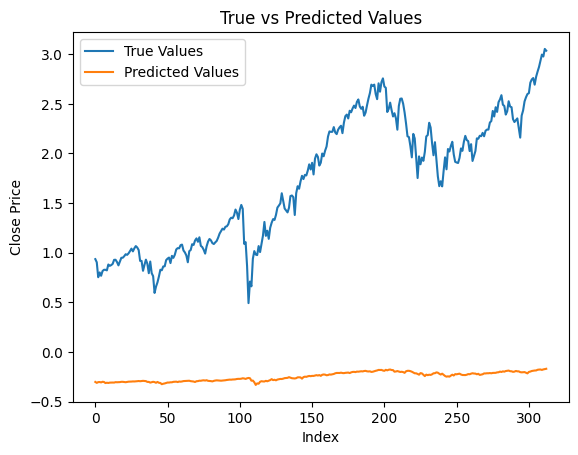

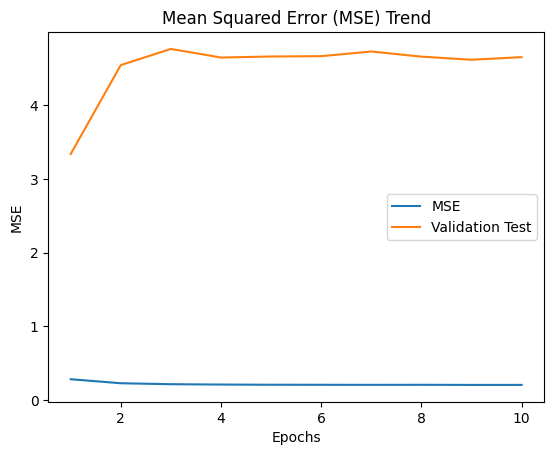

In [ ]:
#training
history = model.fit(X_train, y_train,epochs=10, batch_size=30,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

# Plot the predicted values
plt.plot(y_test, label='True Values')
plt.plot(y_pred[:,0],  label='Predicted Values')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Extract the MSE values from the history object
mse_values = history.history['loss']
validation_values = history.history['val_loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values) + 1), mse_values, label='MSE')
plt.plot(range(1, len(validation_values) + 1), validation_values, label='Validation Test')
plt.title('Mean Squared Error (MSE) Trend')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

## SECONDA ARCHITETTURA: inserisco anche gli indicatori in X_train input. 10 epoche, finestra di 5 settimane

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 50)             11200     
                                                                 
 dropout_2 (Dropout)         (None, 5, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 5, 50)             20200     
                                                                 
 dropout_3 (Dropout)         (None, 5, 50)             0         
                                                                 
 dense_1 (Dense)             (None, 5, 1)              51        
                                                                 
Total params: 31451 (122.86 KB)
Trainable params: 31451 (122.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None

Epoch 1/10
33/33 [==============================] - 7s 41ms/step - loss: 0.1237 - val_loss: 3.0424
Epoch 2/10
33/33 [==============================] - 0s 10ms/step - loss: 0.0975 - val_loss: 2.9189
Epoch 3/10
33/33 [==============================] - 0s 12ms/step - loss: 0.0923 - val_loss: 3.0386
Epoch 4/10
33/33 [==============================] - 0s 10ms/step - loss: 0.0890 - val_loss: 3.0086
Epoch 5/10
33/33 [==============================] - 0s 10ms/step - loss: 0.0866 - val_loss: 3.0454
Epoch 6/10
33/33 [==============================] - 0s 11ms/step - loss: 0.0866 - val_loss: 3.0501
Epoch 7/10
33/33 [==============================] - 1s 16ms/step - loss: 0.0856 - val_loss: 3.0104
Epoch 8/10
33/33 [==============================] - 1s 17ms/step - loss: 0.0852 - val_loss: 2.9689
Epoch 9/10
33/33 [==============================] - 1s 16ms/step - loss: 0.0850 - val_loss: 2.9954
Epoch 10/10
5/5 [==============================] - 1s 5ms/step


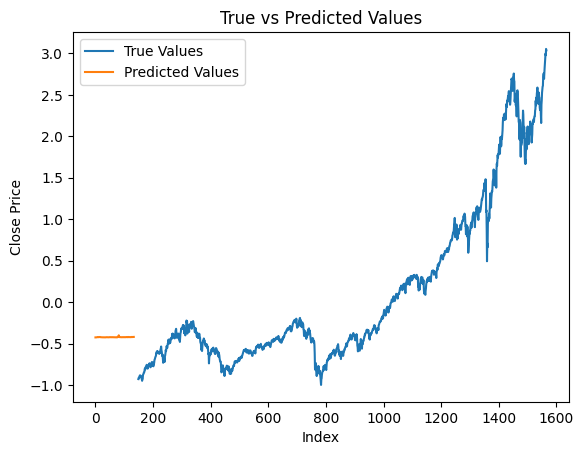

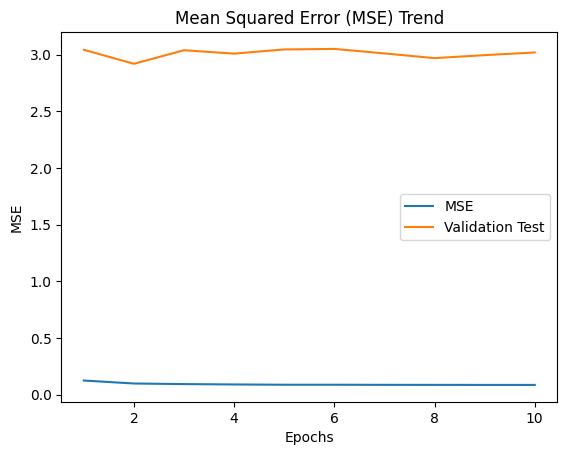

In [ ]:
def LSTM_model(X_train, p_dropout=0.2):
  model =Sequential()
  model.add(
      LSTM(units=50,
           return_sequences=True,
           input_shape =(X_train.shape[1],5))
  )
  model.add(Dropout(p_dropout))
  model.add(LSTM(units=50,
           return_sequences=True))
  model.add(Dropout(p_dropout))

  model.add(Dense(units=1))
  return model

sp500_df['RSI']=ta.rsi(sp500_df.Close, length=10)
sp500_df['EMAF']=ta.ema(sp500_df.Close, length=20)
sp500_df['EMAM']=ta.ema(sp500_df.Close, length=100)
sp500_df['EMAS']=ta.ema(sp500_df.Close, length=150)

sp500_df.dropna(inplace=True)
splitlimit = int(len(sp500_df) * 0.8)
sp500_df_train_set = sp500_df.loc[:sp500_df.index[0]+splitlimit,:] ####iloc


X_train=[]
y_train =[]
df_days=sp500_df_train_set.shape[0]

for x in range(sp500_df.index[0]+5, df_days): #prendo intanto una finestra di 5 settimane
  X_train.append(sp500_df.loc[x-5:x-1,['Close','RSI','EMAF','EMAM','EMAS']].values)
  y_train.append(sp500_df.loc[x,'Close'])

X_train,y_train = np.array(X_train), np.array(y_train)



X_test=[]
y_test =[]

for x in range(sp500_df.index[0]+df_days, sp500_df.shape[0]): #prendo intanto una finestra di 5 settimane
  X_test.append(sp500_df.loc[x-5:x-1,['Close','RSI','EMAF','EMAM','EMAS']].values)
  y_test.append(sp500_df.loc[x,'Close'])

X_test,y_test = np.array(X_test), np.array(y_test) #non serve convertirlo ancora y_test è già pronto


#definition
model=LSTM_model(X_train)
model.build()
display(model.summary())
model.compile(optimizer='adam',
              loss='mean_squared_error')




#training
history = model.fit(X_train, y_train,epochs=10, batch_size=30,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

# Plot the predicted values
plt.plot(sp500_df['Close'], label='True Values')
plt.plot(y_pred[:,0],  label='Predicted Values')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Extract the MSE values from the history object
mse_values = history.history['loss']
validation_values = history.history['val_loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values) + 1), mse_values, label='MSE')
plt.plot(range(1, len(validation_values) + 1), validation_values, label='Validation Test')
plt.title('Mean Squared Error (MSE) Trend')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

## TERZA ARCHITETTURA: proviamo a ridurre il validation set per trainare il modello

In [ ]:
sp500_df.index[0], sp500_df.shape[0], df_days

(298, 1268, 1142)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 10, 50)            11200     
                                                                 
 dropout_6 (Dropout)         (None, 10, 50)            0         
                                                                 
 lstm_7 (LSTM)               (None, 10, 50)            20200     
                                                                 
 dropout_7 (Dropout)         (None, 10, 50)            0         
                                                                 
 dense_3 (Dense)             (None, 10, 1)             51        
                                                                 
Total params: 31451 (122.86 KB)
Trainable params: 31451 (122.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


None

Epoch 1/30
56/56 [==============================] - 6s 30ms/step - loss: 0.0611 - val_loss: 0.4274
Epoch 2/30
56/56 [==============================] - 1s 13ms/step - loss: 0.0431 - val_loss: 0.4382
Epoch 3/30
56/56 [==============================] - 1s 15ms/step - loss: 0.0389 - val_loss: 0.4399
Epoch 4/30
56/56 [==============================] - 1s 19ms/step - loss: 0.0372 - val_loss: 0.4368
Epoch 5/30
56/56 [==============================] - 1s 21ms/step - loss: 0.0355 - val_loss: 0.3954
Epoch 6/30
56/56 [==============================] - 1s 19ms/step - loss: 0.0347 - val_loss: 0.4877
Epoch 7/30
56/56 [==============================] - 1s 22ms/step - loss: 0.0342 - val_loss: 0.3721
Epoch 8/30
56/56 [==============================] - 1s 19ms/step - loss: 0.0345 - val_loss: 0.4778
Epoch 9/30
56/56 [==============================] - 1s 13ms/step - loss: 0.0348 - val_loss: 0.4095
Epoch 10/30
56/56 [==============================] - 1s 13ms/step - loss: 0.0335 - val_loss: 0.4584
Epoch 11/

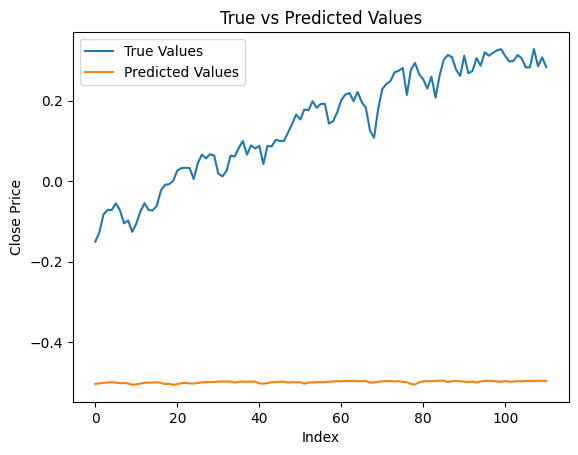

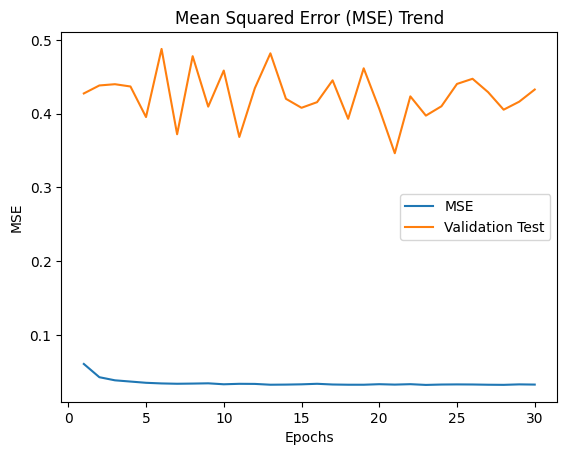

In [ ]:
#nuovo modello: inserisco anche gli indicatori in X_train input. 30 epoche, finestra di 10 settimane

def LSTM_model(X_train, p_dropout=0.2):
  model =Sequential()
  model.add(
      LSTM(units=50,
           return_sequences=True,
           input_shape =(X_train.shape[1],5))
  )
  model.add(Dropout(p_dropout))
  model.add(LSTM(units=50,
           return_sequences=True))
  model.add(Dropout(p_dropout))

  model.add(Dense(units=1))
  return model


sp500_df['RSI']=ta.rsi(sp500_df.Close, length=10)
sp500_df['EMAF']=ta.ema(sp500_df.Close, length=20)
sp500_df['EMAM']=ta.ema(sp500_df.Close, length=100)
sp500_df['EMAS']=ta.ema(sp500_df.Close, length=150)

sp500_df.dropna(inplace=True)
splitlimit = int(len(sp500_df) * 0.9)
sp500_df_train_set = sp500_df.loc[:sp500_df.index[0]+splitlimit,:] ####iloc


X_train=[]
y_train =[]
df_days=sp500_df_train_set.shape[0]

for x in range(sp500_df.index[0]+10, df_days): #prendo intanto una finestra di 10 settimane
  X_train.append(sp500_df.loc[x-10:x-1,['Close','RSI','EMAF','EMAM','EMAS']].values)
  y_train.append(sp500_df.loc[x,'Close'])

X_train,y_train = np.array(X_train), np.array(y_train)



X_test=[]
y_test =[]

for x in range(df_days, sp500_df.shape[0]): #prendo intanto una finestra di 10 settimane
  X_test.append(sp500_df.loc[x-10:x-1,['Close','RSI','EMAF','EMAM','EMAS']].values)
  y_test.append(sp500_df.loc[x,'Close'])

X_test,y_test = np.array(X_test), np.array(y_test) #non serve convertirlo ancora y_test è già pronto


#definition
model=LSTM_model(X_train)
model.build()
display(model.summary())
model.compile(optimizer='adam',
              loss='mean_squared_error')




#training
history = model.fit(X_train, y_train,epochs=30, batch_size=10,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

# Plot the predicted values
plt.plot(y_test, label='True Values')
plt.plot(y_pred[:,0],  label='Predicted Values')

plt.title('True vs Predicted Values')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Extract the MSE values from the history object
mse_values = history.history['loss']
validation_values = history.history['val_loss']

# Plot the trend of MSE with respect to epochs
plt.plot(range(1, len(mse_values) + 1), mse_values, label='MSE')
plt.plot(range(1, len(validation_values) + 1), validation_values, label='Validation Test')
plt.title('Mean Squared Error (MSE) Trend')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()